In [1]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np

import data from a stata file

In [2]:
folder="data"
fileName="chfls.dta"
fileToRead=os.path.join(folder,fileName)

a few questions in the survey are about AIDS and STDs, let's imagine respondents have taken a test on STDs and these are the questions.

In [3]:
questions=["site","jb13","jb13a","jb14","jb15","jb16","jb18","jb19","jb20","region6","zj07","zj05"]
TEST=pd.read_stata(fileToRead,columns=questions,convert_categoricals=False)

In [4]:
TEST.dtypes

site          int8
jb13       float64
jb13a      float64
jb14          int8
jb15          int8
jb16          int8
jb18          int8
jb19          int8
jb20          int8
region6       int8
zj07          int8
zj05          int8
dtype: object

transfer missing values as np.nan

In [5]:
import numpy as np
missing=[-1,-2,-3,-4,-9]
TEST.replace(missing,np.nan,inplace=True)

for question jb13, the right answer is 4. If the respondents gave the right answer, she/he get 1 score; if she/he gave a wrong anwser, or she/he did not answer for any reason, the score is 0.

In [6]:
wrong=[1,2,3,5,6,np.nan]
right=[4]
TEST.jb13.replace(wrong,0,inplace=True)
TEST.jb13.replace(right,1,inplace=True)

for question jb13a, right answer is 3.

In [7]:
wrong=[1,2,4,5,6,np.nan]
right=[3]
TEST.jb13a.replace(wrong,0,inplace=True)
TEST.jb13a.replace(right,1,inplace=True)

actually, jb13 and jb13a are the same question, jb13a was given to respondents at survey sites 1 to 40, and jb13 was given to respondents at sites 41 to 70. let's just combine results from all sites.

In [8]:
TEST['jb13new']=TEST.apply(lambda _: '', axis=1)
for value in TEST.site:
    if value>=41 and value<=70:
        TEST.jb13new = TEST.jb13
    if value>=1 and value<=40:
        TEST.jb13new = TEST.jb13a

for question jb19, the right answer is 1, and the wrong answer is 2 and 3

In [9]:
wrong=[2,3,np.nan]
right=[1]
TEST.jb19.replace(wrong,0,inplace=True)
TEST.jb19.replace(right,1,inplace=True)

for jb14, jb15, jb16,jb18 and jb20, right answer is 2.

In [10]:
wrong=[1,3,np.nan]
right=[2]
TEST.jb14.replace(wrong,0,inplace=True)
TEST.jb14.replace(right,1,inplace=True)
TEST.jb15.replace(wrong,0,inplace=True)
TEST.jb15.replace(right,1,inplace=True)
TEST.jb16.replace(wrong,0,inplace=True)
TEST.jb16.replace(right,1,inplace=True)
TEST.jb18.replace(wrong,0,inplace=True)
TEST.jb18.replace(right,1,inplace=True)
TEST.jb20.replace(wrong,0,inplace=True)
TEST.jb20.replace(right,1,inplace=True)

generate respondents' total score

In [11]:
TEST['score']=TEST.apply(lambda x: x['jb13new']+x['jb14']+x['jb15']+x['jb16']+x['jb18']+x['jb19']+x['jb20'], axis = 1)

I want to compare if scores by region

In [12]:
var1=["region6","score"]
byregion=TEST[var1]

aggregate each region's mean score

In [13]:
aggregatedregion=byregion.groupby(['region6'],as_index=False)['score'].mean()
aggregatedregion['region6']=aggregatedregion['region6'].astype(str)
aggregatedregion

,region6,score
0,1,3.153121
1,2,3.193627
2,3,2.459318
3,4,3.141638
4,5,2.907738
5,6,2.704062


import a shp map file 

In [14]:
folder="data"
fileName="regionschn.shp"
fileSHP=os.path.join(folder,fileName) 
CHN = gpd.read_file(fileSHP)

merge my aggregated region score to the shp file using a common column "region6"

In [15]:
mergeregion = CHN.merge(aggregatedregion, on="region6")
mergeregion

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,NAME2,region6,geometry,score
0,49,CHN,China,4,Fujian,CN.FJ,0,None,Shěng,Province,福建,Fújiàn,Fujian,1,(POLYGON ((117.6890258789064 23.53347206115728...,3.153121
1,49,CHN,China,1,Anhui,CN.AH,0,None,Shěng,Province,安徽|安徽,Ānhuī,Anhui,3,"POLYGON ((116.4263229370118 34.63999176025402,...",2.459318
2,49,CHN,China,15,Jiangsu,CN.JS,0,None,Shěng,Province,江蘇|江苏,Jiāngsū,Jiangsu,2,(POLYGON ((120.9240264892583 32.66013717651367...,3.193627
3,49,CHN,China,11,Heilongjiang,CN.HL,0,None,Shěng,Province,黑龙江省|黑龍江省,Hēilóngjiāng,Heilongjiang,5,(POLYGON ((123.4570465087892 53.50650024414074...,2.907738
4,49,CHN,China,2,Beijing,CN.BJ,0,None,Zhíxiáshì,Municipality,北京|北京,Běijīng,Beijing,4,(POLYGON ((117.5643081665042 38.65569305419933...,3.141638
5,49,CHN,China,3,Chongqing,CN.CQ,0,None,Zhíxiáshì,Municipality,重慶|重庆,Chóngqìng,Chongqing,6,"(POLYGON ((108.5418930053714 32.1896705627442,...",2.704062


plot the map

In [16]:
%matplotlib inline

In [17]:
vartoplot = "score"
colorMap = "Greens"
Nofclass = 6
title = "average score by region"
args={"column":vartoplot,"cmap":colorMap,"scheme":"Quantiles","k":Nofclass,'figsize':(20,13),'legend':True}

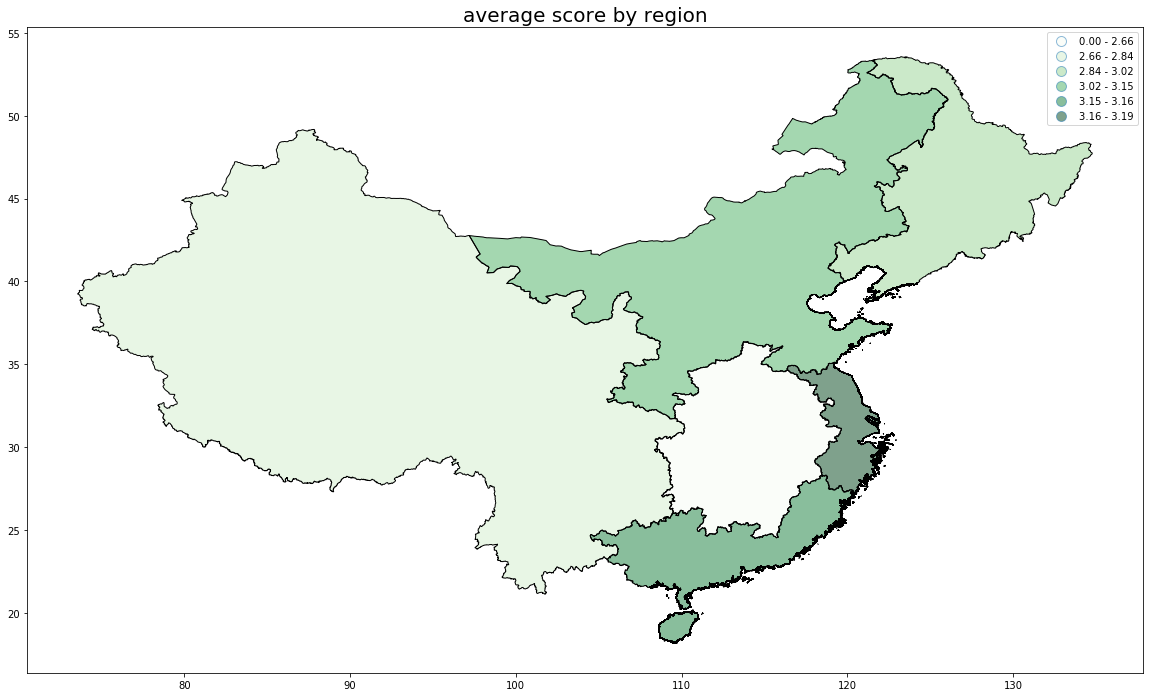

In [18]:
import matplotlib.pyplot as plt
mergeregion.plot(**args)
plt.title(title,{'fontsize': 20})

Above is a exercise for plotting a map, my interest is in the age at first marriage. For the age at first marriage, it would make no sense if I use mode to plot the map because in every region the majority respondents got married at the same age range.

The variable of interest includes zj05(gender),zj07(education level),hy04(marrital status), and a07m(age range at first marriage)

In [19]:
varsOfInterest=["zj05","zj07","hy04","a07m",]
VOI=pd.read_stata(fileToRead,columns=varsOfInterest)

deal with different kinds of missing values

In [20]:
import numpy as np
missing=['dont know','inap','refused','legit skip','out of scope','-1','-2','-3','-4','-9',-1,-2,-3,-4,-9]
VOI.replace(missing,np.nan,inplace=True)

get a subset with respondents in their first marriage only

In [21]:
FM = VOI[VOI['hy04'] == '1st marriage']

and let's see their age when they get married

In [22]:
FM['a07m'].dtype

category

In [23]:
FM['a07m'].value_counts()

20-24         1422
25-29         1332
30-34          202
 < 20          121
35-39           28
40-44            2
50-59            0
45-49            0
legit skip       0
Name: a07m, dtype: int64

In [24]:
FM['a07m'].cat.categories

Index([u'legit skip', u' < 20', u'20-24', u'25-29', u'30-34', u'35-39',
       u'40-44', u'45-49', u'50-59'],
      dtype='object')

this variable is already orderd

In [25]:
FM['a07m'].cat.ordered

True

In [26]:
levels=list(FM['a07m'].cat.categories)
levels

[u'legit skip',
 u' < 20',
 u'20-24',
 u'25-29',
 u'30-34',
 u'35-39',
 u'40-44',
 u'45-49',
 u'50-59']

In [27]:
FM['a07m'].value_counts(sort=False)

legit skip       0
 < 20          121
20-24         1422
25-29         1332
30-34          202
35-39           28
40-44            2
45-49            0
50-59            0
Name: a07m, dtype: int64

no respondents skiped this question, and none were married after 45. But I'm gonna keep these empty categories for now in order to show a complete picture and trend.

In [28]:
FM['a07m'].mode()

0    20-24
dtype: category
Categories (9, object): [legit skip < < 20 < 20-24 < 25-29 ... 35-39 < 40-44 < 45-49 < 50-59]

the mode is between 20 and 24 years old.

In [29]:
np.cumsum(FM['a07m'].value_counts(sort=False,normalize=True))

legit skip    0.000000
 < 20         0.038944
20-24         0.496621
25-29         0.925330
30-34         0.990344
35-39         0.999356
40-44         1.000000
45-49         1.000000
50-59         1.000000
Name: a07m, dtype: float64

In [30]:
import numpy as np

relFrequencies=FM['a07m'].value_counts(sort=False,normalize=True) 
cumulativeTable=np.cumsum(relFrequencies)
pos =0
for percent in cumulativeTable:
    if percent < 0.5: 
        pos +=1 
    else:
        break
cumulativeTable.index[pos]

u'25-29'

half of respondents got married between 25 to 29 years older or even earlier.

if we do further calculation:

In [31]:
relFrequencies=FM['a07m'].value_counts(sort=False,normalize=True) 
cumulativeTable=np.cumsum(relFrequencies)
pos =0
for percent in cumulativeTable:
    if percent < 0.9: 
        pos +=1 
    else:
        break
cumulativeTable.index[pos]

u'25-29'

90% of respondents got married before 30.

and lets plot a bar chart to show the respondents' age at first marriage.

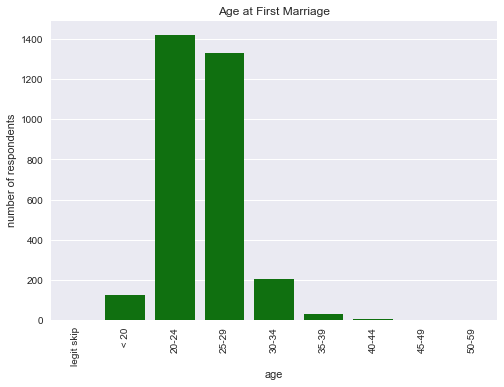

In [32]:
import seaborn as sns
ax=sns.countplot(x='a07m', data=FM,color='green')
ax.set(xlabel='age', ylabel='number of respondents', title='Age at First Marriage')
sns.plt.xticks(rotation=90)
sns.plt.show()

to get rid of empty categories in a07m, we need to drop "legit skip" 

In [33]:
FM['a07m'][FM['a07m']=='legit skip']

Series([], Name: a07m, dtype: category
Categories (9, object): [legit skip < < 20 < 20-24 < 25-29 ... 35-39 < 40-44 < 45-49 < 50-59])

In [34]:
FM.loc[:,'a07m']=FM['a07m'].cat.remove_unused_categories()

/Users/autumn/anaconda/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


and combine the last two categories into one

In [35]:
FM['a07m'].value_counts(sort=False)

 < 20     121
20-24    1422
25-29    1332
30-34     202
35-39      28
40-44       2
Name: a07m, dtype: int64

In [36]:
newList=[]
newCat='35 or more'
for val in FM['a07m']:
    if val in ['35-39', '40-44']:
        newList.append(newCat)
    else:
        newList.append(val)

I named this new list as mage and add it into my sub-dataset

In [37]:
FM.loc[:,'mage']=newList

/Users/autumn/anaconda/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [38]:
FM['mage'].value_counts(sort=False)

25-29         1332
20-24         1422
35 or more      30
 < 20          121
30-34          202
Name: mage, dtype: int64

In [39]:
orderedCats=[' < 20', '20-24', '25-29', '30-34', '35 or more']

In [40]:
FM.loc[:,'mage']=FM['mage'].astype("category", categories=orderedCats, ordered=True)

In [41]:
FM['mage'].value_counts(sort=False)

 < 20          121
20-24         1422
25-29         1332
30-34          202
35 or more      30
Name: mage, dtype: int64

I also add a new column list named edu that combined education after high school into one cotegories

In [42]:
FM['zj07'].value_counts(sort=False)

no school     148
primary       514
low mid      1184
up mid        863
j col         277
univ/grad     143
Name: zj07, dtype: int64

In [43]:
newList=[]
newCat='col/univ/grad'
for val in FM['zj07']:
    if val in ['j col', 'univ/grad']:
        newList.append(newCat)
    else:
        newList.append(val)

In [44]:
FM.loc[:,'edu']=newList

In [45]:
FM['edu'].value_counts(sort=False)

no school         148
col/univ/grad     420
low mid          1184
primary           514
up mid            863
Name: edu, dtype: int64

In [46]:
orderedCats=['no school', 'primary', 'low mid', 'up mid', 'col/univ/grad']

In [47]:
FM.loc[:,'edu']=FM['edu'].astype("category", categories=orderedCats, ordered=True)

In [48]:
FM['edu'].value_counts(sort=False)

no school         148
primary           514
low mid          1184
up mid            863
col/univ/grad     420
Name: edu, dtype: int64

let't see the relationship between gender and age at marriage in a crosstable.

In [49]:
pd.crosstab(FM.zj05,FM.mage)

mage,< 20,20-24,25-29,30-34,35 or more
zj05,,,,,
male,20,550,777,153,23
female,101,872,555,49,7


In [50]:
 pd.crosstab(FM.zj05,FM.edu,normalize=True)

edu,no school,primary,low mid,up mid,col/univ/grad
zj05,,,,,
male,0.012784,0.071269,0.189517,0.139342,0.077661
female,0.034516,0.093001,0.188878,0.136465,0.056568


using statistic caculation, chi test indicates that these two variables are not independent.

In [51]:
from scipy import stats
stats.chi2_contingency(observed= pd.crosstab(FM.zj05,FM.mage))

(225.10438365339147,
 1.4941688740091694e-47,
 4,
 array([[  59.31219826,  697.04087544,  652.92436434,   99.01705826,
           14.7055037 ],
        [  61.68780174,  724.95912456,  679.07563566,  102.98294174,
           15.2944963 ]]))

In [52]:
chi,p,df,expected=stats.chi2_contingency(observed= pd.crosstab(FM.zj05,FM.mage))
if p >= 0.5:
    print('Categorical Variables are independent')
else:
    print('Categorical Variables are not independent')

Categorical Variables are not independent


and let's see it in a bar chart.

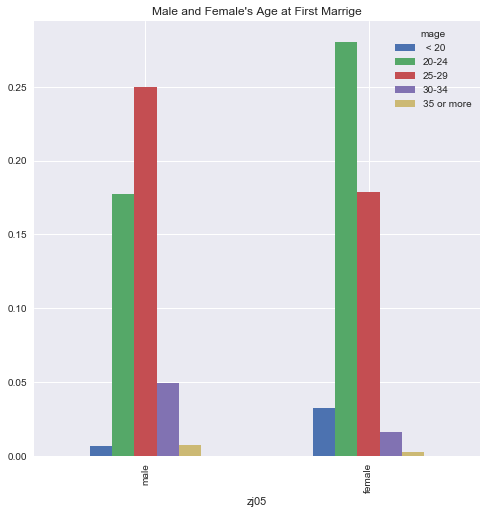

In [53]:
%matplotlib inline 
table=pd.crosstab(FM.zj05,FM.mage,normalize=True)
theTitle="Male and Female's Age at First Marrige"
table.plot(kind="bar",figsize=(8,8),stacked=False,title=theTitle)

I also want to see the relationship between eduaction and age at marriage.

In [54]:
chi,p,df,expected=stats.chi2_contingency(observed= pd.crosstab(FM.edu,FM.mage))
if p >= 0.5:
    print('Categorical Variables are independent')
else:
    print('Categorical Variables are not independent')

Categorical Variables are not independent


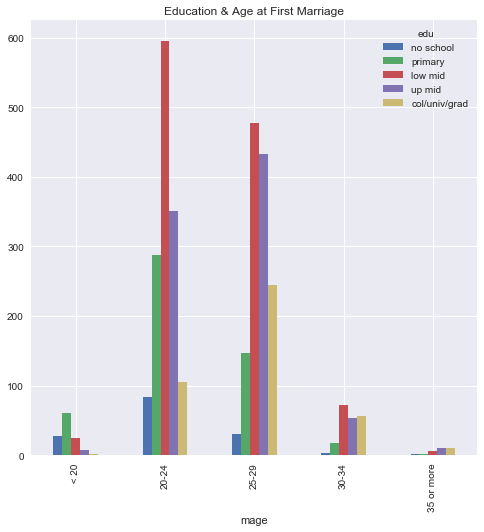

In [55]:
%matplotlib inline 
table=pd.crosstab(FM.mage,FM.edu)
theTitle="Education & Age at First Marriage"
table.plot(kind="bar",figsize=(8,8),stacked=False,title=theTitle)

how about eduacation and gender?

In [56]:
chi,p,df,expected=stats.chi2_contingency(observed= pd.crosstab(FM.edu,FM.zj05))
if p >= 0.5:
    print('Categorical Variables are independent')
else:
    print('Categorical Variables are not independent')

Categorical Variables are not independent


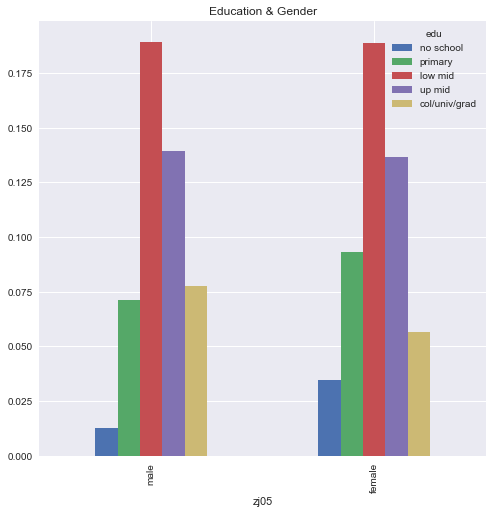

In [57]:
%matplotlib inline 
table=pd.crosstab(FM.zj05,FM.edu,normalize=True)
theTitle="Education & Gender"
table.plot(kind="bar",figsize=(8,8),stacked=False,title=theTitle)

now I want to see the relationship among these three variables

In [58]:
pd.crosstab(FM.edu,[FM.mage,FM.zj05])

mage           < 20        20-24        25-29        30-34        35 or more  \
zj05           male female  male female  male female  male female       male   
edu                                                                            
no school         4     24    18     66    15     16     3      0          0   
primary          12     48   105    182    92     55    12      5          2   
low mid           3     21   261    334   263    214    55     17          5   
up mid            1      7   130    221   252    181    42     12          7   
col/univ/grad     0      1    36     69   155     89    41     15          9   

mage                  
zj05          female  
edu                   
no school          1  
primary            0  
low mid            1  
up mid             3  
col/univ/grad      2

In [59]:
from scipy import stats

chi,p,df,exp=stats.chi2_contingency(observed= pd.crosstab(FM.edu,[FM.mage,FM.zj05]))
if p >= 0.5:
    print('Categorical Variables are independent')
else:
    print('Categorical Variables are not independent')

Categorical Variables are not independent


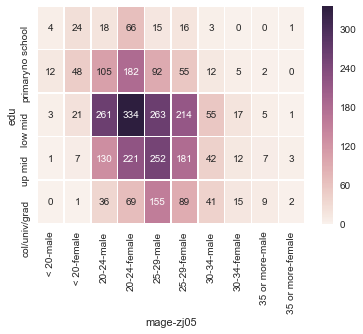

In [60]:
%matplotlib inline

table=pd.crosstab(FM.edu,[FM.mage,FM.zj05])
import seaborn as sns
ax = sns.heatmap(table,yticklabels=True,linewidths=.5,annot=True,fmt='d')